In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [4]:
data = pd.read_csv('1.01.+Simple+linear+regression.csv')

In [5]:
data #double check data loaded, as you can see its 2 columns with student SAT scores and their GPA. 

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [6]:
data.describe() #gives us our critical statistics variables from the data

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [7]:
# Time to create the linear regression of this data to predict the GPA using an SAT score
# The formula for a linear regression algo is ^y = B0 + B1x + epsilon or just ^y = B0 + B1x1 
#(note there is no x0 as it is typically '1' b0*1=b0 so we leave it out)
# y is our GPA data
# x1 is our SAT data
y = data['GPA']
x1 = data['SAT']

In [8]:
# Let go ahead and plot it just for funsies

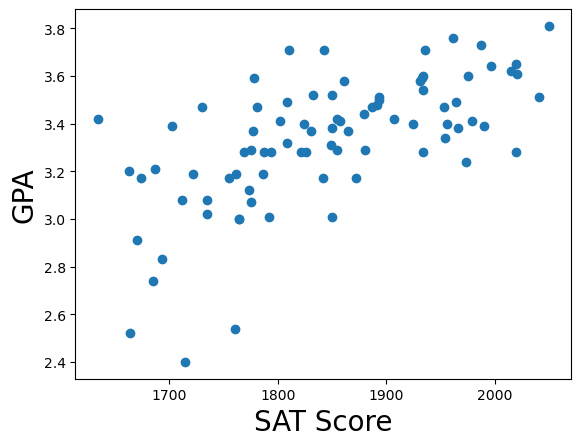

In [9]:
plt.scatter(x1,y)
plt.xlabel('SAT Score',fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()
# Obviously down below each dot represents a individual student

In [10]:
# Now we preform the regression testing, statsmodels uses 'add_constant'
x = sm.add_constant(x1)
# Now results will contain the output of the ordinary least squares regression
results = sm.OLS(y,x).fit()

In [11]:
# Oh lord have mercy look at them stats... 
# Note the coeficient of x or SAT in our case, and the constant. Thats whats important
# Also important to note any value of P>|t| greater than 0.05 should be removed from the equation. 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           7.20e-11
Time:                        08:05:36   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# Here is the meaning full chart showing the regression on our scatter

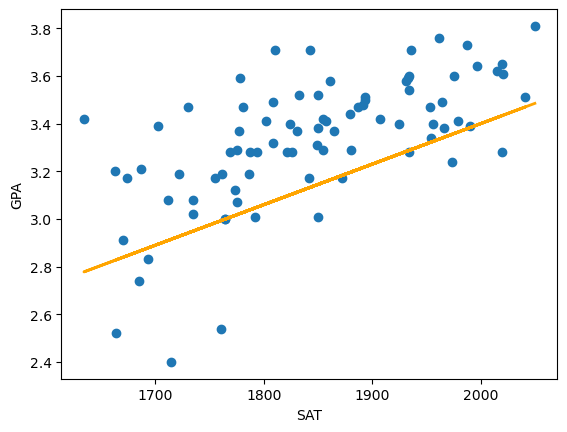

In [13]:
plt.scatter(x1,y)
yhat1 = 0.0017*x1
ourPrecious = plt.plot(x1,yhat1, lw=2, c='orange', label='regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

In [14]:
# Now I will do this other example using real estate price data, again linear regression

In [15]:
data2 = pd.read_csv('real_estate_price_size.csv')
data2 # looking at this we have price versus size of the home.

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [16]:
y = data2['price']
x1 = data2['size']

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           8.13e-31
Time:                        08:05:36   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

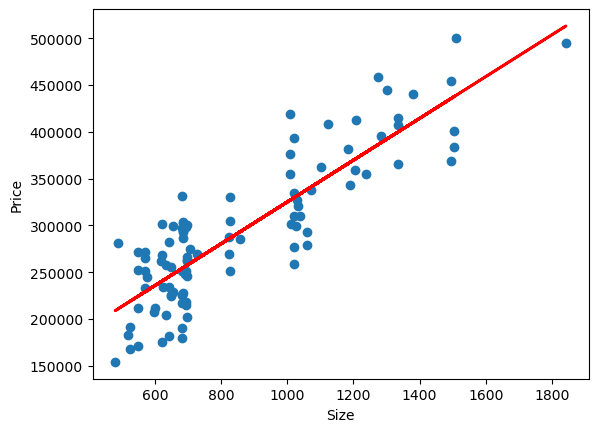

In [17]:
plt.scatter(x1,y)
yhat2 = 223.1787*x1 + 1.019e+05
ourPrecious = plt.plot(x1,yhat2, lw=2, c='red', label='regression line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [18]:
# Lets use seaborn to make it prettier
sns.set()

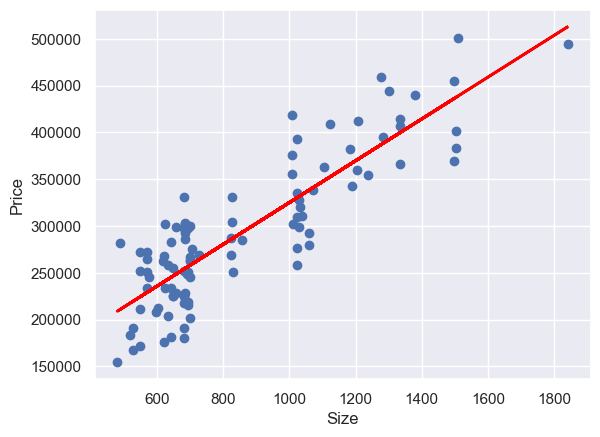

In [19]:
plt.scatter(x1,y)
yhat = 223.1787*x1 + 1.019e+05
ourPrecious = plt.plot(x1,yhat, lw=2, c='red', label='regression line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()
# See the difference

In [20]:
yhatGPA = lambda x1: 0.0017*x1 
result = yhatResults(1850)
print(result)

NameError: name 'yhatResults' is not defined

In [ ]:
yhatHomes = lambda x1: 223.1787*x1 + 1.019e+05
result = yhatHomes(1850)
print(result)

In [ ]:
# Next we dive into multiple linear regression, where more than 1 x variable and be present
# The algo used in this is population model: ^y = x0b0 + x1b1 + x2b2 + xn..bn.. + epsilon
# reduced just ^y = b0 + x1b1 + xn..bn..
# its important to note, we are no longer looking for a best fit line anymore, with multiple linear regression its difficult to visualize.
# the goal is to find the best fitting model by decreasing the error
# to decrease error or sse, increase the ssr. sst = sse + ssr so technically sse = sst - ssr. increase ssr to reduce sse 

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset')

In [ ]:
data3 = pd.read_csv('students-performance-dataset/Student_performance_data _.csv')

In [ ]:
data3

In [ ]:
y = data3['GPA']
x1 = data3[['StudyTimeWeekly', 'ParentalSupport', 'Absences']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
x
newdata = pd.DataFrame({'const':1,'StudyTimeWeekly':[15, 15],'ParentalSupport':[0,4],'Absences':[5,11]})
newdata = newdata[['const','StudyTimeWeekly','ParentalSupport','Absences']]
futureforecast = results.predict(newdata)
futureforecast

In [ ]:
data4 = pd.read_csv("real_estate_price_size_year.csv")
data4

In [ ]:
y = data4['price']
x1 = data4[['size', 'year']]
x = sm.add_constant(x1)
results = sm.OLS(y, x).fit()
results.summary()

In [ ]:
yhat3 = 227.7009 * x1 + 2916.7853 * x1 + (-5.772e+06)

In [ ]:
data5 = pd.read_csv('real_estate_price_size_year_view.csv')
data5

In [ ]:
data5copy = data5.copy()
data5copy['view'] = data5copy['view'].map({'No sea view':0, 'Sea view':1})
data5copy

In [ ]:
y = data5copy['price']
x1 = data5copy[['size','year']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
y = data5copy['price']
x1 = data5copy[['size','year','view']]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

In [ ]:
# this is a multi-linear regression model, so we will not plot it but these are the prediction equations
# yhat5first = -5.772e+06 + 227.7009 * data5copy['size'] + 2916.7853 * data5copy['year']
# yhat5yes = -5.398e+06 + 223.0316 * data5copy['size'] + 2718.9489 * data5copy['year'] + 5.673e+04 * 1 #yes
# yhat5no = -5.398e+06 + 223.0316 * data5copy['size'] + 2718.9489 * data5copy['year'] + 5.673e+04 * 0 #no

In [ ]:
x

In [21]:
newdata = pd.DataFrame({'const':1,'size':[1700,1700],'year':[1986,2024],'view':[0,0]})
newdata = newdata[['const','size','year','view']]
futureforecast = results.predict(newdata)

ValueError: shapes (2,4) and (2,) not aligned: 4 (dim 1) != 2 (dim 0)

In [ ]:
futureforecast

In [ ]:
# working with sklearn linear regression alg vvv

In [22]:
from sklearn.linear_model import LinearRegression
data6 = pd.read_csv('1.01.+Simple+linear+regression.csv')
data6.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [23]:
x = data6['SAT']
y = data6['GPA']
x.shape

(84,)

In [24]:
y.shape

(84,)

In [25]:
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(x_matrix,y)#(input,target)

LinearRegression()

In [28]:
reg.score(x_matrix,y) #R-squeared

0.40600391479679754

In [29]:
reg.coef_ #Coefficients

array([0.00165569])

In [30]:
reg.intercept_ #intercept

0.2750402996602799

In [31]:
# Prediction modeling
reg.predict([[1740]])
new_data = pd.DataFrame(data=[1740,1760],columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [32]:
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


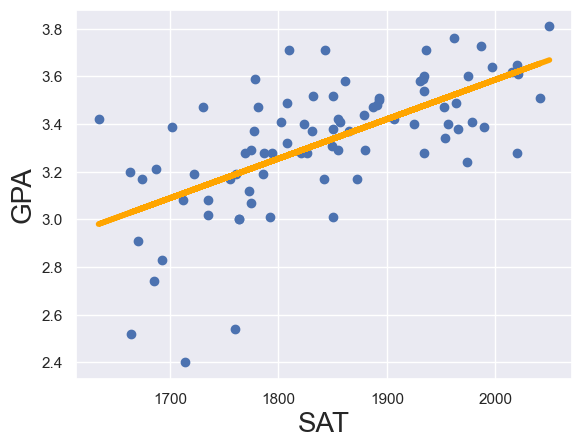

In [33]:
plt.scatter(x,y)
yhat = reg.coef_ * x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='orange',label='regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

In [34]:
data7 = pd.read_csv('students-performance-dataset/Student_performance_data _.csv')
data7.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [35]:
# Creating the multiLinear regression

#Declare the variables
x = data7[['ParentalSupport','StudyTimeWeekly','StudentID']]
y = data7['GPA']

#Create the regression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [36]:
reg.coef_

array([ 1.50466357e-01,  2.79883608e-02, -1.04909054e-05])

In [37]:
reg.intercept_

1.3364268602612626

In [38]:
# calculating the r-square. reg.score(x,y) will return the r-squared of the linear regression
reg.score(x,y)

0.06623284294363097

### Thats nice but we want the adjusted r-squared value, here is the math to get this. 


### Formula for adjusted R-Squared
$R^2_{adj.} = 1 - (1 - R^2)*\frac{n-1}{n-p-1}$

In [39]:
# HERE n = 2392 or the number of observations and p = 3 or the number of predictorss.
x.shape 

(2392, 3)

In [40]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

In [41]:
adjustedR2 = 1 - (1-r2)*((n-1)/(n-p-1))

In [42]:
adjustedR2

0.06505976862572094

### How do we detect unwanted x variables ruining our score? Feature Selection or F-Regression

In [43]:
# [Particularly Helpful too]
#simplify models, improve speed, and prevents unwanted issues from having to many features.

#### remember a p value > .05 is a variable we want to reject, so how do we find these in scikit learn? we can't, scikit learn is a machine learning package, not a statistical learning package. Though we do have a workaround. feature_selection.f_regression
Now what this does is it creates a linear regression for each individual independant variable 


In [44]:
from sklearn.feature_selection import f_regression as freg

In [45]:
freg(x,y)#first array is the f-stats and the second array is the p values.

(array([9.02684146e+01, 7.93643098e+01, 1.73852043e-02]),
 array([4.86476598e-21, 1.00020113e-18, 8.95111691e-01]))

In [46]:
# lets grab just the p values
pval = freg(x,y)[1]

In [47]:
pval

array([4.86476598e-21, 1.00020113e-18, 8.95111691e-01])

In [48]:
pval.round(3)

array([0.   , 0.   , 0.895])

In [49]:
# 0.895 from student id clearly is an irrelevant variable and should be removed

#### important to note, f-regression ignores the correlation of the variable between each other it is more so for simple linear regression and less usefull for multilinear regression modeling. ####

## A more correct version as a class to work with multilinear regression modeling..

In [193]:
from sklearn import linear_model
data7 = pd.read_csv('students-performance-dataset/Student_performance_data _.csv')
data7.head()
filtered_data7 = data7[(data7["StudentID"] >= 1397) & (data7["StudentID"] <= 1400)]
filtered_data7

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
396,1397,18,1,3,1,2.962016,18,0,2,0,0,0,0,1.089441,4.0
397,1398,16,1,3,3,14.926276,6,0,3,0,0,0,0,2.813211,2.0
398,1399,18,1,2,1,0.167094,17,1,3,1,0,0,1,1.868759,4.0
399,1400,15,0,3,3,3.371981,7,0,3,1,1,0,0,3.035694,1.0


In [155]:
#Declare the variables
x = data7[['ParentalSupport','StudyTimeWeekly','StudentID']]
y = data7['GPA']

In [156]:
# Since the p-values are obtained through certain statistics, we need the 'stat' module from scipy.stats
import scipy.stats as stat

# Below we will ovewrite a part of the class with one that includes p-values
# Source code of the ORIGINAL class: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/linear_model/base.py#L362


class LinearRegression(linear_model.LinearRegression):
    """
    LinearRegression class after sklearn's, but calculate t-statistics
    and p-values for model coefficients (betas).
    Additional attributes available after .fit()
    are `t` and `p` which are of the shape (y.shape[1], X.shape[1])
    which is (n_features, n_coefs)
    This class sets the intercept to 0 by default, since usually we include it
    in X.
    """
    
    # nothing changes in __init__
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,
                 n_jobs=1, positive = False):
        # fit the intercept, normalize it
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
        self.positive = positive

    
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        
        # Calculate SSE (sum of squared errors)
        # and SE (standard error)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])

        # compute the t-statistic for each feature
        self.t = self.coef_ / se
        # find the p-value for each feature
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [157]:
reg_with_pvalues = LinearRegression()

In [158]:
reg_with_pvalues.fit(x,y)

LinearRegression()

In [159]:
reg_with_pvalues.p

array([0.        , 0.        , 0.54063345])

##### Make a chart/Dataframe for it because why not #####

In [160]:
reg_summary = pd.DataFrame([['ParentalSupport'],['StudyTimeWeekly'],['StudentID']],columns = ['Features'])

In [161]:
reg_summary['Coefficients'] = reg_with_pvalues.coef_

In [162]:
reg_summary['p-values'] = reg_with_pvalues.p.round(3)

In [163]:
reg_summary

,Features,Coefficients,p-values
0,ParentalSupport,0.150466,0.000
1,StudyTimeWeekly,0.027988,0.000
2,StudentID,-0.000010,0.541


### Extremely important note that just because a p-value is 0.000 does not mean that the value is relevant. ITS A WAY TO TELL IF A VARIABLE IRRELEVANT!  

## One big issue with data is the difference in magnitudes between their values. A Way we deal with this is standardization or normalization of the data. 

In [164]:
from sklearn.preprocessing import StandardScaler as SS

In [165]:
scaler = SS()

In [166]:
scaler.fit(x)

StandardScaler()

In [167]:
x_scaled = scaler.transform(x)

In [168]:
x_scaled

array([[-0.10874395,  1.78033552, -1.73132686],
       [-0.99955054,  0.99737625, -1.72987865],
       [-0.10874395, -0.98404514, -1.72843045],
       ...,
       [-0.10874395, -0.52489493,  1.72843045],
       [-0.10874395,  0.46794965,  1.72987865],
       [-0.10874395,  1.42400846,  1.73132686]])

In [169]:
anotherReg = LinearRegression()

In [170]:
anotherReg.fit(x_scaled, y)

LinearRegression()

In [171]:
anotherReg.coef_

array([ 0.16891024,  0.15817881, -0.00724408])

In [172]:
anotherReg.intercept_

1.9061863027265407

In [173]:
AnotherReg_summary = pd.DataFrame([['Bias'],['ParentalSupport'],['StudyTimeWeekly'],['StudentID']],columns = ['Features'])
AnotherReg_summary['Weights'] =  anotherReg.intercept_, anotherReg.coef_[0], anotherReg.coef_[1], anotherReg.coef_[2]

In [174]:
AnotherReg_summary

,Features,Weights
0,Bias,1.906186
1,ParentalSupport,0.168910
2,StudyTimeWeekly,0.158179
3,StudentID,-0.007244


### Since we standardized or normalized the data we need to make some adjustment to use the weights for predictions
### Otherwise, we will have incorrect predicted values due to the scaling. 

In [175]:
new_data = pd.DataFrame(data=[[0,15,1400],[2,10,1399],[4,0,1398], [4,16,1397]], columns=['ParentalSupport','StudyTimeWeekly','StudentID'])

In [176]:
new_data

,ParentalSupport,StudyTimeWeekly,StudentID
0,0,15,1400
1,2,10,1399
2,4,0,1398
3,4,16,1397


In [177]:
new_data_scaled = scaler.transform(new_data)

In [178]:
anotherReg.predict(new_data_scaled)

array([1.741565  , 1.90256641, 1.923626  , 2.37145027])

In [179]:
reg_simple = LinearRegression()
x_simple_matrix = x_scaled[:,:2]
x_simple_matrix

array([[-0.10874395,  1.78033552],
       [-0.99955054,  0.99737625],
       [-0.10874395, -0.98404514],
       ...,
       [-0.10874395, -0.52489493],
       [-0.10874395,  0.46794965],
       [-0.10874395,  1.42400846]])

In [180]:
reg_simple.fit(x_simple_matrix, y)
reg_simple.predict(new_data_scaled[:, :2])

array([1.73305684, 1.89419366, 1.9155611 , 2.36282315])